In [1]:
import requests

In [2]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import datetime
import matplotlib.pyplot as plt

In [3]:
# Asking WebAPI for results

In [4]:
url = 'http://ergast.com/api/f1/2019/qualifying.json?limit=500'
resp = requests. get(url)

In [5]:
data = resp.json()

In [6]:
data

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.4',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2019/qualifying.json',
  'limit': '500',
  'offset': '0',
  'total': '418',
  'RaceTable': {'season': '2019',
   'Races': [{'season': '2019',
     'round': '1',
     'url': 'https://en.wikipedia.org/wiki/2019_Australian_Grand_Prix',
     'raceName': 'Australian Grand Prix',
     'Circuit': {'circuitId': 'albert_park',
      'url': 'http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit',
      'circuitName': 'Albert Park Grand Prix Circuit',
      'Location': {'lat': '-37.8497',
       'long': '144.968',
       'locality': 'Melbourne',
       'country': 'Australia'}},
     'date': '2019-03-17',
     'time': '05:10:00Z',
     'QualifyingResults': [{'number': '44',
       'position': '1',
       'Driver': {'driverId': 'hamilton',
        'permanentNumber': '44',
        'code': 'HAM',
        'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton',
        'givenName': 'Lewis',
        

In [7]:
# Getting List of races

In [8]:
races = json_normalize(data['MRData']['RaceTable']['Races'])

In [9]:
races

,Circuit.Location.country,Circuit.Location.lat,Circuit.Location.locality,Circuit.Location.long,Circuit.circuitId,Circuit.circuitName,Circuit.url,QualifyingResults,date,raceName,round,season,time,url
0,Australia,-37.8497,Melbourne,144.968,albert_park,Albert Park Grand Prix Circuit,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,"[{'number': '44', 'position': '1', 'Driver': {...",2019-03-17,Australian Grand Prix,1,2019,05:10:00Z,https://en.wikipedia.org/wiki/2019_Australian_...
1,Bahrain,26.0325,Sakhir,50.5106,bahrain,Bahrain International Circuit,http://en.wikipedia.org/wiki/Bahrain_Internati...,"[{'number': '16', 'position': '1', 'Driver': {...",2019-03-31,Bahrain Grand Prix,2,2019,15:10:00Z,https://en.wikipedia.org/wiki/2019_Bahrain_Gra...
2,China,31.3389,Shanghai,121.22,shanghai,Shanghai International Circuit,http://en.wikipedia.org/wiki/Shanghai_Internat...,"[{'number': '77', 'position': '1', 'Driver': {...",2019-04-14,Chinese Grand Prix,3,2019,06:10:00Z,https://en.wikipedia.org/wiki/2019_Chinese_Gra...
3,Azerbaijan,40.3725,Baku,49.8533,BAK,Baku City Circuit,http://en.wikipedia.org/wiki/Baku_City_Circuit,"[{'number': '77', 'position': '1', 'Driver': {...",2019-04-28,Azerbaijan Grand Prix,4,2019,12:10:00Z,https://en.wikipedia.org/wiki/2019_Azerbaijan_...
4,Spain,41.57,Montmeló,2.26111,catalunya,Circuit de Barcelona-Catalunya,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,"[{'number': '77', 'position': '1', 'Driver': {...",2019-05-12,Spanish Grand Prix,5,2019,13:10:00Z,https://en.wikipedia.org/wiki/2019_Spanish_Gra...
5,Monaco,43.7347,Monte-Carlo,7.42056,monaco,Circuit de Monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,"[{'number': '44', 'position': '1', 'Driver': {...",2019-05-26,Monaco Grand Prix,6,2019,13:10:00Z,https://en.wikipedia.org/wiki/2019_Monaco_Gran...
6,Canada,45.5,Montreal,-73.5228,villeneuve,Circuit Gilles Villeneuve,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,"[{'number': '5', 'position': '1', 'Driver': {'...",2019-06-09,Canadian Grand Prix,7,2019,18:10:00Z,https://en.wikipedia.org/wiki/2019_Canadian_Gr...
7,France,43.2506,Le Castellet,5.79167,ricard,Circuit Paul Ricard,http://en.wikipedia.org/wiki/Paul_Ricard_Circuit,"[{'number': '44', 'position': '1', 'Driver': {...",2019-06-23,French Grand Prix,8,2019,13:10:00Z,https://en.wikipedia.org/wiki/2019_French_Gran...
8,Austria,47.2197,Spielburg,14.7647,red_bull_ring,Red Bull Ring,http://en.wikipedia.org/wiki/Red_Bull_Ring,"[{'number': '16', 'position': '1', 'Driver': {...",2019-06-30,Austrian Grand Prix,9,2019,13:10:00Z,https://en.wikipedia.org/wiki/2019_Austrian_Gr...
9,UK,52.0786,Silverstone,-1.01694,silverstone,Silverstone Circuit,http://en.wikipedia.org/wiki/Silverstone_Circuit,"[{'number': '77', 'position': '1', 'Driver': {...",2019-07-14,British Grand Prix,10,2019,13:10:00Z,https://en.wikipedia.org/wiki/2019_British_Gra...


In [10]:
#Creating Reesult Dataset with only desired names: ["Round", "Country", "Position", "Team", "Driver Name", "Q1", "Q2", "Q3"]

In [11]:
results=[]

In [12]:
#race_data = json_normalize(data = data['MRData']['RaceTable']['Races'], record_path='QualifyingResults') 
for index, race in races.iterrows():
    race_data = json_normalize(race['QualifyingResults']) 
    for index, row in race_data.iterrows():
        results.append((race['round'], race['Circuit.Location.country'], row['position'], row['Constructor.name'], (row['Driver.givenName'] + " " + row['Driver.familyName']), row['Q1'], row['Q2'], row['Q3'],))

In [13]:
column_names = ["Round", "Country", "Position", "Team", "Driver Name", "Q1", "Q2", "Q3"]

In [14]:
results_df = pd.DataFrame(results, columns = column_names)

In [15]:
results_df

,Round,Country,Position,Team,Driver Name,Q1,Q2,Q3
0,1,Australia,1,Mercedes,Lewis Hamilton,1:22.043,1:21.014,1:20.486
1,1,Australia,2,Mercedes,Valtteri Bottas,1:22.367,1:21.193,1:20.598
2,1,Australia,3,Ferrari,Sebastian Vettel,1:22.885,1:21.912,1:21.190
3,1,Australia,4,Red Bull,Max Verstappen,1:22.876,1:21.678,1:21.320
4,1,Australia,5,Ferrari,Charles Leclerc,1:22.017,1:21.739,1:21.442
5,1,Australia,6,Haas F1 Team,Romain Grosjean,1:22.959,1:21.870,1:21.826
6,1,Australia,7,Haas F1 Team,Kevin Magnussen,1:22.519,1:22.221,1:22.099
7,1,Australia,8,McLaren,Lando Norris,1:22.702,1:22.423,1:22.304
8,1,Australia,9,Alfa Romeo,Kimi Räikkönen,1:22.966,1:22.349,1:22.314
9,1,Australia,10,Racing Point,Sergio Pérez,1:22.908,1:22.532,1:22.781


In [16]:
#Checking the types of columns

In [17]:
results_df.dtypes

Round          object
Country        object
Position       object
Team           object
Driver Name    object
Q1             object
Q2             object
Q3             object
dtype: object

In [18]:
#Converting Coulumns to ddesired DataTypes

In [19]:
convert_dict = {'Round': int, 
                'Position': int,
                'Q1': str,
                'Q2': str,
                'Q3': str
               } 

In [20]:
results_df = results_df.astype(convert_dict) 

In [21]:
#results_df.Q1 = '0' + results_df.Q1

In [22]:
#results_df[['Q1','Q2', 'Q3']] = results_df[['Q1','Q2', 'Q3']].apply(pd.to_datetime, format='%M:%S.%f', errors='coerce')

In [23]:
results_df.dtypes

Round           int64
Country        object
Position        int64
Team           object
Driver Name    object
Q1             object
Q2             object
Q3             object
dtype: object

In [24]:
results_merc = results_df[results_df['Team'] == 'Mercedes']

In [25]:
#Creating dataset with pilots and mean positions

In [26]:
results_pilots = results_df['Driver Name'].unique()

In [27]:
results_pilots

array(['Lewis Hamilton', 'Valtteri Bottas', 'Sebastian Vettel',
       'Max Verstappen', 'Charles Leclerc', 'Romain Grosjean',
       'Kevin Magnussen', 'Lando Norris', 'Kimi Räikkönen',
       'Sergio Pérez', 'Nico Hülkenberg', 'Daniel Ricciardo',
       'Alexander Albon', 'Antonio Giovinazzi', 'Daniil Kvyat',
       'Lance Stroll', 'Pierre Gasly', 'Carlos Sainz', 'George Russell',
       'Robert Kubica'], dtype=object)

In [28]:
pilots_means=[]
positions = results_df[['Driver Name', 'Position']]
for pilot in results_pilots:
    mean = positions[positions['Driver Name'] == pilot].mean()['Position']
    pilots_means.append((pilot, mean))

In [29]:
column_names = ["Driver Name", "Mean Position"]
pilot_means_df = pd.DataFrame(pilots_means, columns = column_names)

In [30]:
pilot_means_df = pilot_means_df.sort_values(by=['Mean Position'])

In [31]:
pilot_means_df

,Driver Name,Mean Position
0,Lewis Hamilton,2.285714
1,Valtteri Bottas,3.000000
4,Charles Leclerc,4.000000
2,Sebastian Vettel,4.380952
3,Max Verstappen,4.571429
7,Lando Norris,9.428571
16,Pierre Gasly,9.857143
17,Carlos Sainz,10.285714
11,Daniel Ricciardo,10.523810
12,Alexander Albon,10.550000


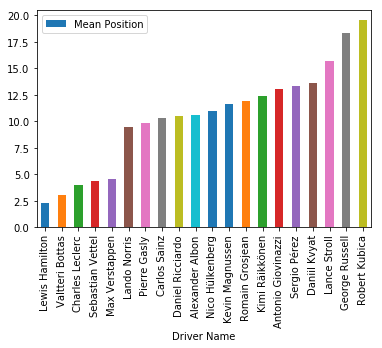

In [32]:
pilot_means_df.plot.bar(x='Driver Name', y='Mean Position')

In [33]:
results_df['min_time'] = pd.DataFrame([results_df['Q1'], results_df['Q2'], results_df['Q3']]).min()

In [34]:
results_df

,Round,Country,Position,Team,Driver Name,Q1,Q2,Q3,min_time
0,1,Australia,1,Mercedes,Lewis Hamilton,1:22.043,1:21.014,1:20.486,1:20.486
1,1,Australia,2,Mercedes,Valtteri Bottas,1:22.367,1:21.193,1:20.598,1:20.598
2,1,Australia,3,Ferrari,Sebastian Vettel,1:22.885,1:21.912,1:21.190,1:21.190
3,1,Australia,4,Red Bull,Max Verstappen,1:22.876,1:21.678,1:21.320,1:21.320
4,1,Australia,5,Ferrari,Charles Leclerc,1:22.017,1:21.739,1:21.442,1:21.442
5,1,Australia,6,Haas F1 Team,Romain Grosjean,1:22.959,1:21.870,1:21.826,1:21.826
6,1,Australia,7,Haas F1 Team,Kevin Magnussen,1:22.519,1:22.221,1:22.099,1:22.099
7,1,Australia,8,McLaren,Lando Norris,1:22.702,1:22.423,1:22.304,1:22.304
8,1,Australia,9,Alfa Romeo,Kimi Räikkönen,1:22.966,1:22.349,1:22.314,1:22.314
9,1,Australia,10,Racing Point,Sergio Pérez,1:22.908,1:22.532,1:22.781,1:22.532


In [35]:
results_mercedes = results_df[results_df['Team'] == 'Mercedes']
results_ferrari = results_df[results_df['Team'] == 'Ferrari']
results_redbull = results_df[results_df['Team'] == 'Red Bull']
results_haas = results_df[results_df['Team'] == 'Haas F1 team']
results_mclaren = results_df[results_df['Team'] == 'McLaren']
results_alfa = results_df[results_df['Team'] == 'Alfa Romeo']
results_racingpoint = results_df[results_df['Team'] == 'Racing Point']
results_renault = results_df[results_df['Team'] == 'Renault']
results_torro=results_df[results_df['Team'] == 'Toro Rosso']
results_williams=results_df[results_df['Team'] == 'Williams']

In [36]:
first_places = results_mercedes.iloc[::2] 

In [37]:
first_places

,Round,Country,Position,Team,Driver Name,Q1,Q2,Q3,min_time
0,1,Australia,1,Mercedes,Lewis Hamilton,1:22.043,1:21.014,1:20.486,1:20.486
22,2,Bahrain,3,Mercedes,Lewis Hamilton,1:29.262,1:28.578,1:28.190,1:28.190
40,3,China,1,Mercedes,Valtteri Bottas,1:32.658,1:31.728,1:31.547,1:31.547
58,4,Azerbaijan,1,Mercedes,Valtteri Bottas,1:42.026,1:41.500,1:40.495,1:40.495
78,5,Spain,1,Mercedes,Valtteri Bottas,1:16.979,1:15.924,1:15.406,1:15.406
98,6,Monaco,1,Mercedes,Lewis Hamilton,1:11.542,1:10.835,1:10.166,1:10.166
119,7,Canada,2,Mercedes,Lewis Hamilton,1:11.518,1:11.010,1:10.446,1:10.446
138,8,France,1,Mercedes,Lewis Hamilton,1:30.609,1:29.520,1:28.319,1:28.319
159,9,Austria,2,Mercedes,Lewis Hamilton,1:03.818,1:03.803,1:03.262,1:03.262
178,10,UK,1,Mercedes,Valtteri Bottas,1:25.750,1:25.672,1:25.093,1:25.093


In [38]:
second_places = results_mercedes.iloc[1::2] 

In [39]:
second_places

,Round,Country,Position,Team,Driver Name,Q1,Q2,Q3,min_time
1,1,Australia,2,Mercedes,Valtteri Bottas,1:22.367,1:21.193,1:20.598,1:20.598
23,2,Bahrain,4,Mercedes,Valtteri Bottas,1:29.498,1:28.830,1:28.256,1:28.256
41,3,China,2,Mercedes,Lewis Hamilton,1:33.115,1:31.637,1:31.570,1:31.570
59,4,Azerbaijan,2,Mercedes,Lewis Hamilton,1:41.614,1:41.580,1:40.554,1:40.554
79,5,Spain,2,Mercedes,Lewis Hamilton,1:17.292,1:16.038,1:16.040,1:16.038
99,6,Monaco,2,Mercedes,Valtteri Bottas,1:11.562,1:10.701,1:10.252,1:10.252
123,7,Canada,6,Mercedes,Valtteri Bottas,1:11.229,1:11.095,1:11.101,1:11.095
139,8,France,2,Mercedes,Valtteri Bottas,1:30.550,1:29.437,1:28.605,1:28.605
161,9,Austria,4,Mercedes,Valtteri Bottas,1:04.084,1:03.863,1:03.537,1:03.537
179,10,UK,2,Mercedes,Lewis Hamilton,1:25.513,1:25.840,1:25.099,1:25.099


In [40]:
pilots_comparision=[]
for i in range(len(first_places.index)):
    pilot1=first_places.iloc[[i]]
    pilot2=second_places.iloc[[i]]
    pilots_comparision.append((pilot1['Round'].values[0], pilot1['Country'].values[0], pilot1['Driver Name'].values[0], pilot2['Driver Name'].values[0], pilot1['min_time'].values[0], pilot2['min_time'].values[0])) 

In [41]:
column_names = ["Round", "Country", "First Driver", "Second Driver", "First min_time", "Second min_time"]
pilots_comparision_df = pd.DataFrame(pilots_comparision, columns = column_names)

In [42]:
pilots_comparision_df

,Round,Country,First Driver,Second Driver,First min_time,Second min_time
0,1,Australia,Lewis Hamilton,Valtteri Bottas,1:20.486,1:20.598
1,2,Bahrain,Lewis Hamilton,Valtteri Bottas,1:28.190,1:28.256
2,3,China,Valtteri Bottas,Lewis Hamilton,1:31.547,1:31.570
3,4,Azerbaijan,Valtteri Bottas,Lewis Hamilton,1:40.495,1:40.554
4,5,Spain,Valtteri Bottas,Lewis Hamilton,1:15.406,1:16.038
5,6,Monaco,Lewis Hamilton,Valtteri Bottas,1:10.166,1:10.252
6,7,Canada,Lewis Hamilton,Valtteri Bottas,1:10.446,1:11.095
7,8,France,Lewis Hamilton,Valtteri Bottas,1:28.319,1:28.605
8,9,Austria,Lewis Hamilton,Valtteri Bottas,1:03.262,1:03.537
9,10,UK,Valtteri Bottas,Lewis Hamilton,1:25.093,1:25.099


In [43]:
pilots_comparision_df[['First min_time','Second min_time']] = pilots_comparision_df[['First min_time','Second min_time']].apply(pd.to_datetime, format='%M:%S.%f', errors='coerce')

#pilots_comparision_df['First min_time'] = (pilots_comparision_df['First min_time'] - datetime.datetime.strptime('1900-01-01 00:00:00.000' ,'%Y-%m-%d %H:%M:%S.%f')).dt.total_seconds()

In [44]:
pilots_comparision_df

,Round,Country,First Driver,Second Driver,First min_time,Second min_time
0,1,Australia,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:20.486,1900-01-01 00:01:20.598
1,2,Bahrain,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:28.190,1900-01-01 00:01:28.256
2,3,China,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:31.547,1900-01-01 00:01:31.570
3,4,Azerbaijan,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:40.495,1900-01-01 00:01:40.554
4,5,Spain,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:15.406,1900-01-01 00:01:16.038
5,6,Monaco,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:10.166,1900-01-01 00:01:10.252
6,7,Canada,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:10.446,1900-01-01 00:01:11.095
7,8,France,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:28.319,1900-01-01 00:01:28.605
8,9,Austria,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:03.262,1900-01-01 00:01:03.537
9,10,UK,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:25.093,1900-01-01 00:01:25.099


In [45]:
pilots_comparision_df['Difference'] = (pilots_comparision_df['Second min_time'] - pilots_comparision_df['First min_time']).dt.total_seconds()

In [46]:
pilots_comparision_df

,Round,Country,First Driver,Second Driver,First min_time,Second min_time,Difference
0,1,Australia,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:20.486,1900-01-01 00:01:20.598,0.112
1,2,Bahrain,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:28.190,1900-01-01 00:01:28.256,0.066
2,3,China,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:31.547,1900-01-01 00:01:31.570,0.023
3,4,Azerbaijan,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:40.495,1900-01-01 00:01:40.554,0.059
4,5,Spain,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:15.406,1900-01-01 00:01:16.038,0.632
5,6,Monaco,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:10.166,1900-01-01 00:01:10.252,0.086
6,7,Canada,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:10.446,1900-01-01 00:01:11.095,0.649
7,8,France,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:28.319,1900-01-01 00:01:28.605,0.286
8,9,Austria,Lewis Hamilton,Valtteri Bottas,1900-01-01 00:01:03.262,1900-01-01 00:01:03.537,0.275
9,10,UK,Valtteri Bottas,Lewis Hamilton,1900-01-01 00:01:25.093,1900-01-01 00:01:25.099,0.006


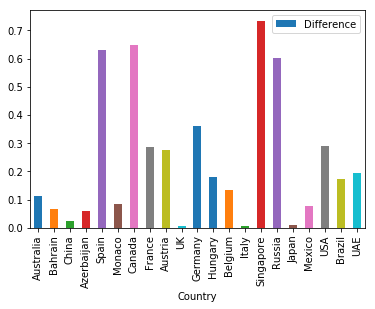

In [47]:
pilots_comparision_df.plot.bar(x='Country', y='Difference')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


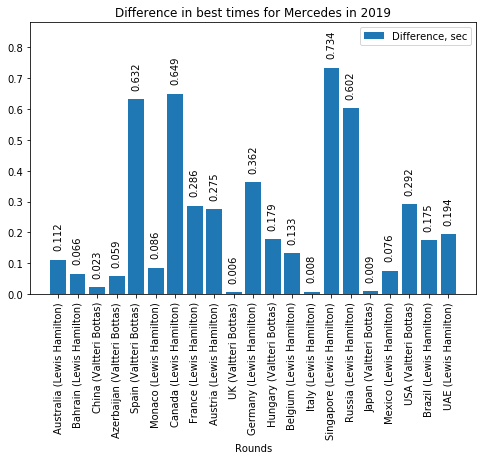

In [48]:
fig = plt.figure(figsize=(8,5))
plt.margins(y=.2)

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Difference in best times for Mercedes in 2019' )
diffs = ax.bar(pilots_comparision_df['Round'],pilots_comparision_df['Difference'], label='Difference, sec' )
ax.set_xticks(pilots_comparision_df['Round'])
ax.set_xticklabels(pilots_comparision_df['Country'] + ' (' + pilots_comparision_df['First Driver']+')', rotation=90, fontsize='medium' )
ax. set_xlabel('Rounds' )
ax.legend()

for diff in diffs:
        height = diff.get_height()
        ax.text(diff.get_x() + diff.get_width()/2., height +0.03,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=90)